<a href="https://colab.research.google.com/github/Ishika-max/Projects/blob/main/purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SUB TASK 0
**Data Visualistion**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
#loading data set
df_train_1 = pd.read_csv('/content/drive/My Drive/customer_behavior_train.csv')
df_test = pd.read_csv('/content/drive/My Drive/customer_behavior_test.csv')
print(df_train_1.head())
print(df_train_1.info())
print(df_train_1.describe())
df_train_1.shape

   Time_on_site  Pages_viewed  Clicked_ad  Cart_value   Referral  \
0          2.29          5.37           1       10.00   Facebook   
1          7.49         16.36           0       25.52  Instagram   
2          5.71         13.69           0       10.00     Google   
3          1.23          3.22           1       41.49     Google   
4          3.55         10.72           0       21.57     Direct   

   Browser_Refresh_Rate Last_Ad_Seen  Purchase  
0                143.14            D         1  
1                136.66            A         1  
2                 67.13            C         0  
3                 92.12            C         0  
4                 70.31            B         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time_on_site          1800 non-null   float64
 1   Pages_viewed          1800 non-nu

(1800, 8)

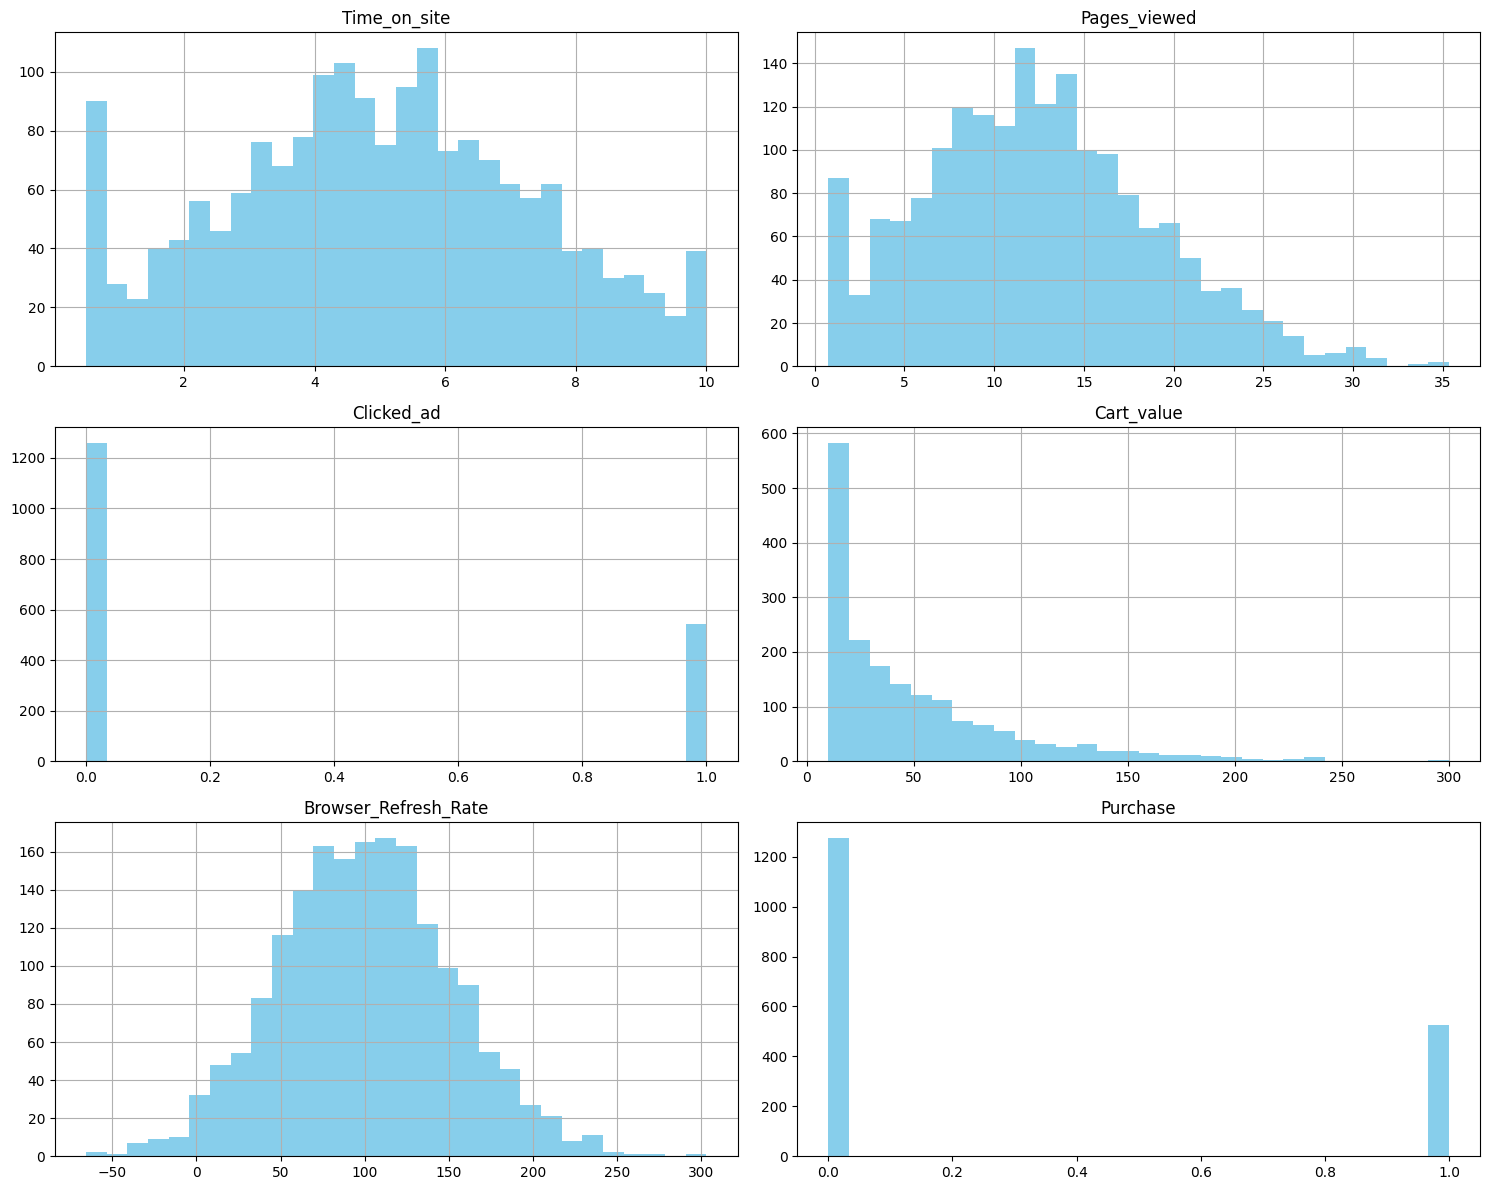

<function matplotlib.pyplot.show(close=None, block=None)>

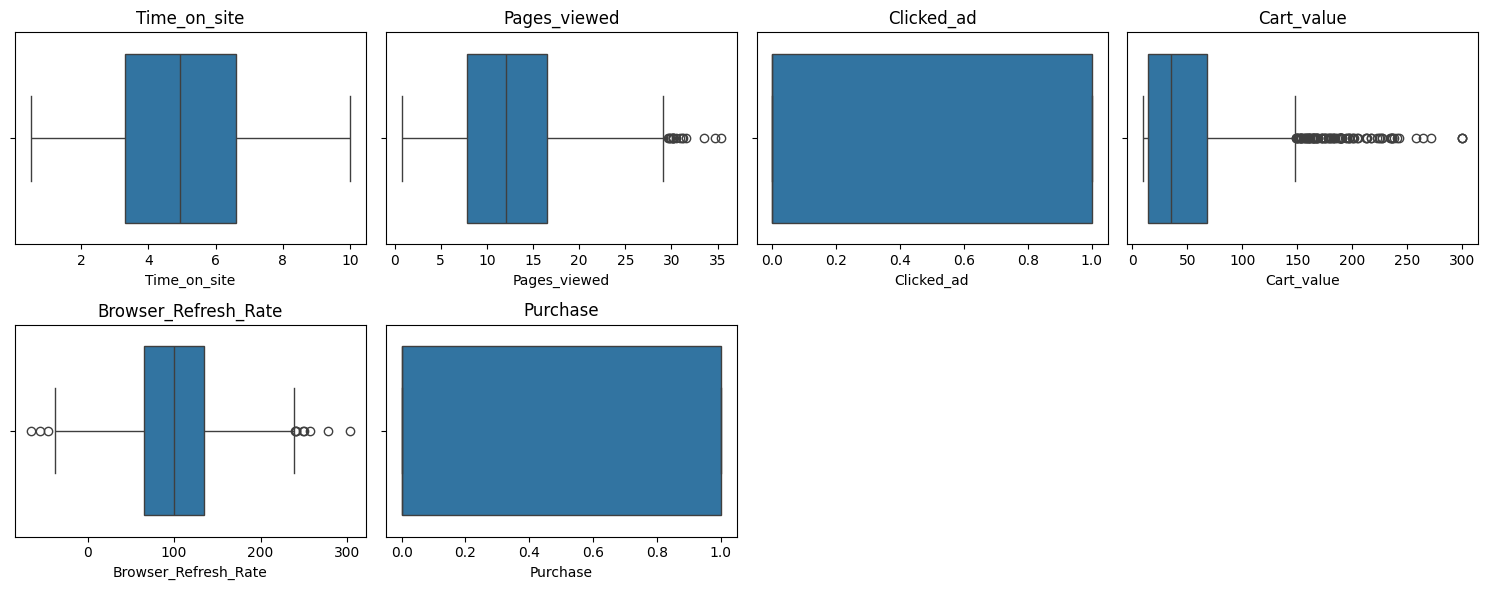

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_1 = df_train_1.select_dtypes(include=['int64', 'float64']).columns

# Histograms
df_train_1[numerical_cols_1].hist(bins=30, figsize=(15, 12),color='skyblue')
plt.tight_layout()
plt.grid(False)
plt.show()

# Boxplots
plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_cols_1):
    plt.subplot(2, len(numerical_cols_1)//2 + 1, i+1)
    sns.boxplot(x=df_train_1[col])
    plt.title(col)
plt.tight_layout()
plt.show





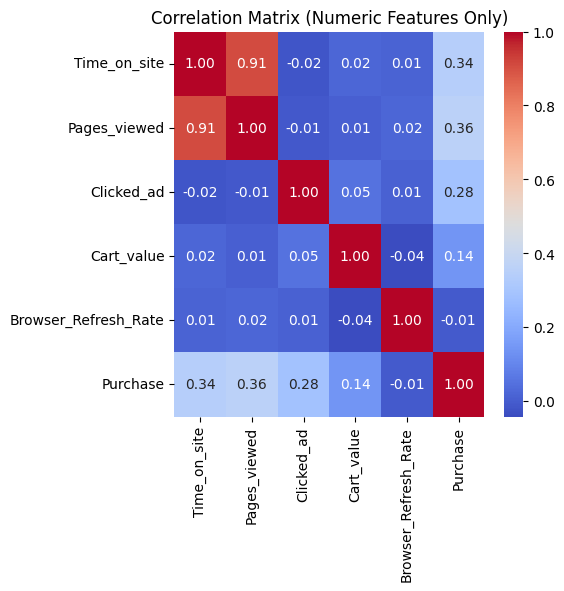

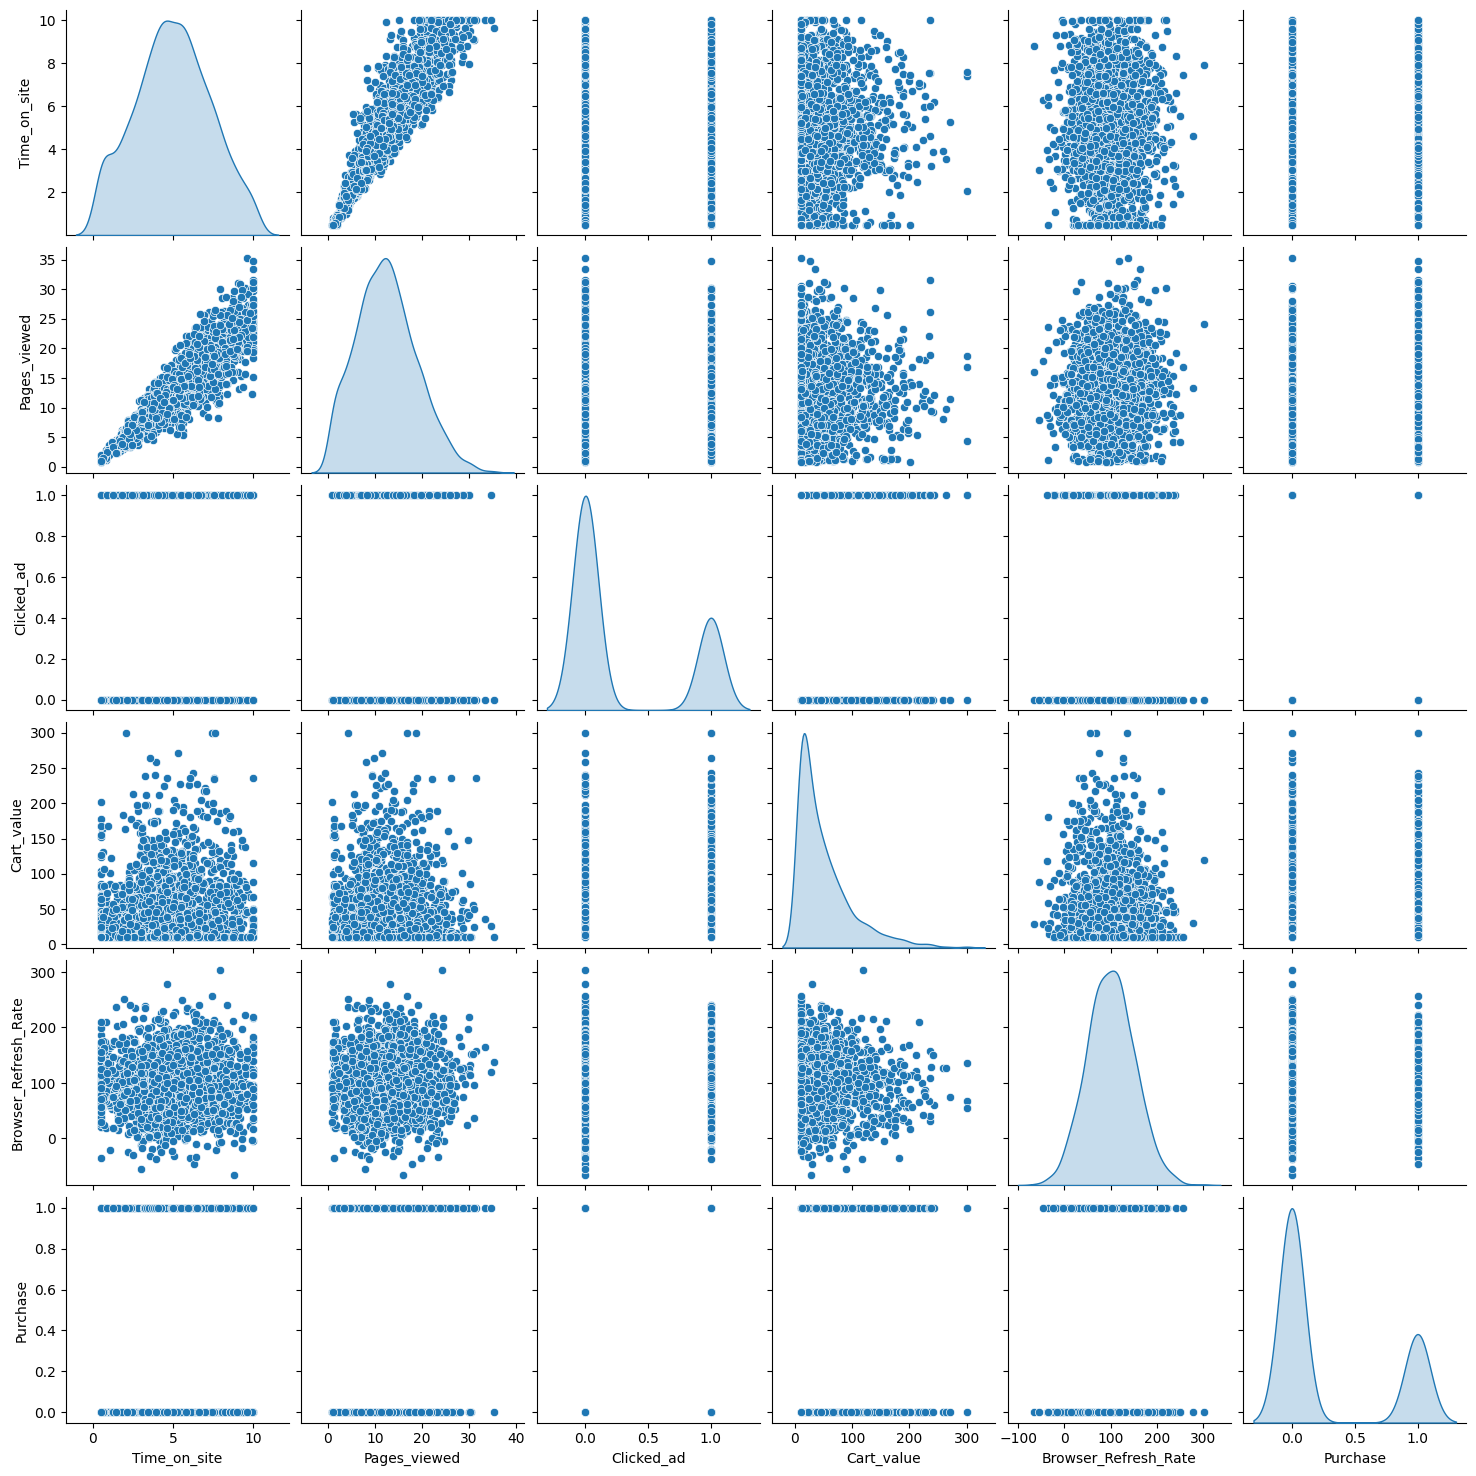

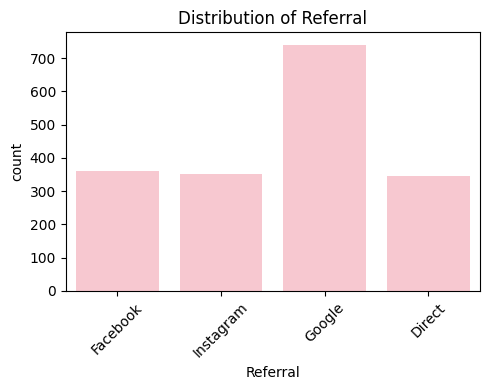

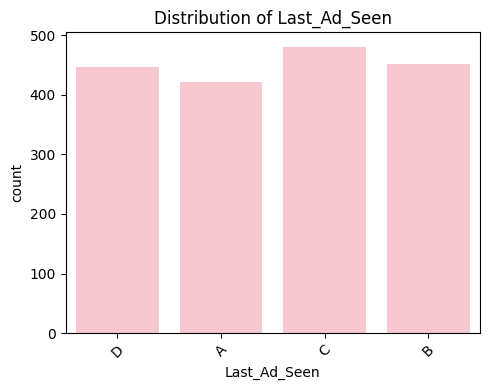

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_df = df_train_1.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Features Only)')
plt.show()

sns.pairplot(numeric_df, diag_kind='kde')
plt.show()

categorical_cols = df_train_1.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(5,4))
    sns.countplot(data=df_train_1, x=col,color='pink')
    plt.title(f"Distribution of {col}")

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



Pages_Viewed and Cart_Value show significant positive skew and numerous outliers.
Browser_Refresh_Rate also has notable outliers.
Time_on_Site has a balanced spread with no extreme outliers—useful as a stable, clean feature.

Based on the correlation matrix, Pages_viewed, Time_on_site, and Clicked_ad show the strongest positive relationships with the purchase outcome. These features are critical for model prediction. In contrast, Browser_Refresh_Rate has low correlation  with Purchase (–0.01), indicating it may not add predictive value and could even add noise.. Notably, Pages_viewed and Time_on_site are highly correlated with each other.

#### checking missing or null values and outlier detection

In [ ]:
# Check for missing values in each column
print(" Missing Values:")
print(df_train_1.isnull().sum())

# Check total number of missing values
total_missing = df_train_1.isnull().sum().sum()
print(f"\nTotal missing values in dataset: {total_missing}")

# Check for duplicate rows
duplicate_rows = df_train_1.duplicated().sum()
print(f"\n Number of duplicate rows: {duplicate_rows}")
# dropping duplicate and missing rows
df_train_1.drop_duplicates(inplace=True)
df_train_1.dropna(inplace=True)

 Missing Values:
Time_on_site            0
Pages_viewed            0
Clicked_ad              0
Cart_value              0
Referral                0
Browser_Refresh_Rate    0
Last_Ad_Seen            0
Purchase                0
dtype: int64

Total missing values in dataset: 0

 Number of duplicate rows: 0


In [ ]:
import pandas as pd
df_train = df_train_1.copy()
# Function to detect outliers using IQR method for a given column
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numeric_cols = df_train_1.select_dtypes(include='number').columns.tolist()
for col in numeric_cols:
    outliers = detect_outliers_iqr(df_train, col)
    print(f"Outliers in '{col}': {len(outliers)} found")






Outliers in 'Time_on_site': 0 found
Outliers in 'Pages_viewed': 16 found
Outliers in 'Clicked_ad': 0 found
Outliers in 'Cart_value': 95 found
Outliers in 'Browser_Refresh_Rate': 11 found
Outliers in 'Purchase': 0 found


In [ ]:
#function to clip outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower, upper)
    return df
for col in numeric_cols:
    df_train =cap_outliers(df_train,col)
df_train.shape

(1800, 8)

**I experimented with removing outliers entirely, as well as eliminating them individually; however, both approaches led to a slight decrease in model accuracy. In contrast, applying clipping to handle the outliers yielded improved accuracy for both models.**




In [ ]:
#function to remove outliers
def remove_outlier(df ,column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
#df_train = remove_outlier(df_train,'Browser_Refresh_Rate')
#df_train.shape

In [ ]:
#df_train = remove_outlier(df_train,'Cart_value')
#df_train.shape

In [ ]:
#df_train = remove_outlier(df_train,'Pages_viewed')
#df_train.shape

# SUB TASK 1

### Logistic Regression

 **1) sigmoid function**
$$f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

**2) cost function and loss(cross entropy)**


$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* m is the number of training examples in the dataset


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is -

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
 *    $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

   **3 )Assumtions**
*  assuming a linear relationship between the independent variables and the log-odds of the dependent variable.
*  Each training example is assumed to be independent of the others.
* Predictor variables are not correlated with each other. This helps maintain model stability and interpretability.

**4) working of model**

Training Phase:
Each input feature is weighted by the model (learned from training data).
These weights represent the influence of that feature on the likelihood of purchase.

Prediction Phase:
It calculates a weighted sum of input features.
Applies the sigmoid function to produce a probability between 0 and 1:
If this probability > 0.5 (default threshold), the model predicts class 1 (purchase), otherwise class 0.


**5) why this model?**
* Binary Classification:
Our target is binary (purchase = 0 or 1), and logistic regression is designed for such problems.
we can analyze the learned coefficients to understand feature importance, making the model transparent and explainable.
* It is fast to train, even on large datasets, and easy to tune.
* Resistant to Overfitting with Regularization:
The C parameter allows us to control regularization, making the model less likely to overfit.



### Random Forest Classifier
**1)Mathematical formulation**

Let:  
$( T_1, T_2, \dots, T_B )$ : the $( B )$ decision trees.

$ ( x )$: the input features.

$( h_b(x) )$: the prediction of the $( b )$-th tree.

**For Classification:**  
$$[
\hat{y} = \text{majority\_vote}(h_1(x), h_2(x), \dots, h_B(x))
]$$

**For Regression:**  
$$[
\hat{y} = \frac{1}{B} \sum_{b=1}^{B} h_b(x)
]$$

 2. Split Criterion for Trees

Each tree splits nodes by selecting the best feature and threshold that minimize impurity.

- **Gini Impurity** (classification):  
$$[
G(p) = 1 - \sum_{i=1}^{K} p_i^2
] $$
where $( p_i )$ is the proportion of class $( i )$ in a node.

- **Entropy** (information gain):  
$$[
H(p) = - \sum_{i=1}^{K} p_i \log_2 p_i
]$$




**2)working of model**
* Create Many Decision Trees: The algorithm makes many decision trees each using a random part of the data. So every tree is a bit different.
* Pick Random Features: When building each tree it doesn’t look at all the features (columns) at once. It picks a few at random to decide how to split the data. This helps the trees stay different from each other.
* Each Tree Makes a Prediction: Every tree gives its own answer or prediction based on what it learned from its part of the data.
* Combine the Predictions:
* For classification we choose a category as the final answer is the one that most trees agree on i.e majority voting.
* For regression we predict a number as the final answer is the average of all the trees predictions.


**3) Assumptions**
* Each tree makes its own decisions: Every tree in the forest makes its own predictions without relying on others.
* Random parts of the data are used: Each tree is built using random samples and features to reduce mistakes.
* Enough data is needed: Sufficient data ensures the trees are different and learn unique patterns and variety.
* Different predictions improve accuracy: Combining the predictions from different trees leads to a more accurate final result.

**4) why this model**

* Our dataset has numerical and categorical features (Referral, Last_Ad_Seen). Random Forest handles this well, especially with one-hot encoding.
* Captures non-linear relationships, can model complex interactions and non-linear dependencies between features and the target.
* As it uses multiple decision trees, it’s less sensitive to noise in the data.
* Feature importance	It provides feature importance scores to help you understand what drives purchases.
* No need to standardize or normalize features.


# SUB TASK 2

In [ ]:
# Separate features and target

X_train = df_train.drop(columns=['Purchase'])
y_train = df_train['Purchase']

X_test = df_test.drop(columns=['Purchase'])
y_test = df_test['Purchase']


In [ ]:
# **LOGISTIC REGRESSION


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score ,confusion_matrix,RocCurveDisplay
from sklearn.metrics import accuracy_score



# Identify categorical and numeric columns in training data
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X_train.select_dtypes(include='number').columns.tolist()

# Defining preprocessing for numeric and categorical data
preprocessor_1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])
# Creating the full pipeline: preprocessing + logistic regression
model_pipeline_1 = Pipeline([
    ('preprocessor', preprocessor_1),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Train the model
model_pipeline_1.fit(X_train, y_train)
# === Evaluate on training data to ensure model is not overfitting ===
train_preds = model_pipeline_1.predict(X_train)
train_probs = model_pipeline_1.predict_proba(X_train)[:, 1]
print("Accuracy:", accuracy_score(y_train, train_preds))
print("Training performance:")
print(classification_report(y_train, train_preds))
print(f"Training ROC-AUC: {roc_auc_score(y_train, train_probs):.3f}")



# Predict on test data
test_preds_1 = model_pipeline_1.predict(X_test)
test_probs_1 = model_pipeline_1.predict_proba(X_test)[:, 1]


print("\n Test Performance:")
print("Accuracy:", accuracy_score(y_test, test_preds_1))
print(classification_report(y_test, test_preds_1))
print(f"ROC-AUC: {roc_auc_score(y_test, test_probs_1):.3f}")


Accuracy: 0.7305555555555555
Training performance:
              precision    recall  f1-score   support

           0       0.87      0.73      0.79      1274
           1       0.53      0.74      0.61       526

    accuracy                           0.73      1800
   macro avg       0.70      0.73      0.70      1800
weighted avg       0.77      0.73      0.74      1800

Training ROC-AUC: 0.806

 Test Performance:
Accuracy: 0.7244444444444444
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       314
           1       0.53      0.79      0.63       136

    accuracy                           0.72       450
   macro avg       0.71      0.74      0.71       450
weighted avg       0.78      0.72      0.74       450

ROC-AUC: 0.828


In [ ]:
# RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier


# Combine preprocessing
preprocessor_2 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),

    ],
    remainder='passthrough'  # numeric columns will be passed as is
)

# Create the pipeline with preprocessing + classifier
model_pipeline_2 = Pipeline(steps=[
    ('preprocessor', preprocessor_2),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])

# Train the model
model_pipeline_2.fit(X_train, y_train)

# === Evaluate on training data to ensure model is not overfitting ===
train_preds = model_pipeline_2.predict(X_train)
train_probs = model_pipeline_2.predict_proba(X_train)[:, 1]
print("Accuracy:", accuracy_score(y_train, train_preds))
print("Training performance:")
print(classification_report(y_train, train_preds))
print(f"Training ROC-AUC: {roc_auc_score(y_train, train_probs):.3f}")

# Predict on test data
test_preds_2 = model_pipeline_2.predict(X_test)
test_probs_2 = model_pipeline_2.predict_proba(X_test)[:, 1]

# Evaluate
print("\nTest Accuracy:", accuracy_score(y_test, test_preds_2))
print("Test ROC-AUC:", roc_auc_score(y_test, test_probs_2))
print("\nClassification Report:\n", classification_report(y_test, test_preds_2))

Accuracy: 1.0
Training performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00       526

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800

Training ROC-AUC: 1.000

Test Accuracy: 0.7688888888888888
Test ROC-AUC: 0.8264448295241663

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       314
           1       0.63      0.58      0.60       136

    accuracy                           0.77       450
   macro avg       0.73      0.72      0.72       450
weighted avg       0.76      0.77      0.77       450



#### **accuracy of prediction  for training set and testing set in Random Forest Classifier is 1.0 and 0.76 respectively which shows that model is overfitting and we need to tune it**

# SUB TASK 3 - HYPERPARAMETER TUNING
* performing random search to tune parameters


### Logistic regression classifer


Fitting 5 folds for each of 100 candidates, totalling 500 fits
✅ Best Parameters: {'classifier__C': np.float64(0.010547383621352036)}
🔍 Accuracy: 0.7444444444444445
🔍 ROC AUC: 0.8306950168602473
🔍 Confusion Matrix:
 [[236  78]
 [ 37  99]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80       314
           1       0.56      0.73      0.63       136

    accuracy                           0.74       450
   macro avg       0.71      0.74      0.72       450
weighted avg       0.77      0.74      0.75       450



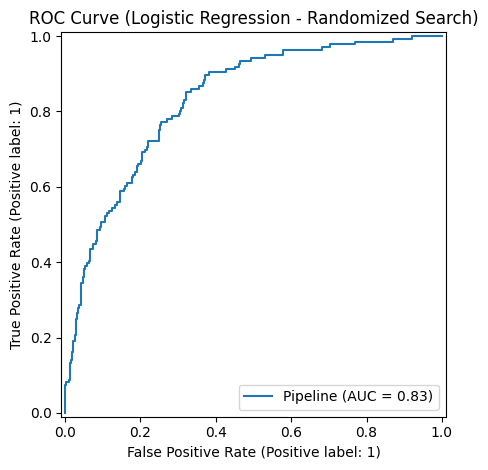

In [ ]:

from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'classifier__C':loguniform(1e-3, 1e3)  # C sampled log-uniformly between 0.001 and 1000

}

random_search = RandomizedSearchCV(
    model_pipeline_1,
    param_distributions=param_dist,
    n_iter=100,           # number of parameter samples to try
    cv=5,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1,
    random_state=42,
    error_score='raise'
)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
best_params = random_search.best_params_
print("✅ Best Parameters:", best_params)

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]
#setting a threshold value
threshold_ = 0.545
y_pred_c = (y_proba >= threshold_).astype(int)

print("🔍 Accuracy:", accuracy_score(y_test, y_pred_c))
print("🔍 ROC AUC:", roc_auc_score(y_test, y_proba))
print("🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_c))
print("\nClassification Report:\n", classification_report(y_test, y_pred_c))
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("ROC Curve (Logistic Regression - Randomized Search)")
plt.tight_layout()
plt.show()


### Random forest classifier

Fitting 5 folds for each of 100 candidates, totalling 500 fits
✅ Best Parameters: {'classifier__max_depth': 5, 'classifier__n_estimators': 199}
🔍 test Accuracy: 0.7888888888888889
🔍 test ROC AUC: 0.8436446234544773
🔍 Confusion Matrix:
 [[252  62]
 [ 33 103]]

 test Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84       314
           1       0.62      0.76      0.68       136

    accuracy                           0.79       450
   macro avg       0.75      0.78      0.76       450
weighted avg       0.81      0.79      0.79       450



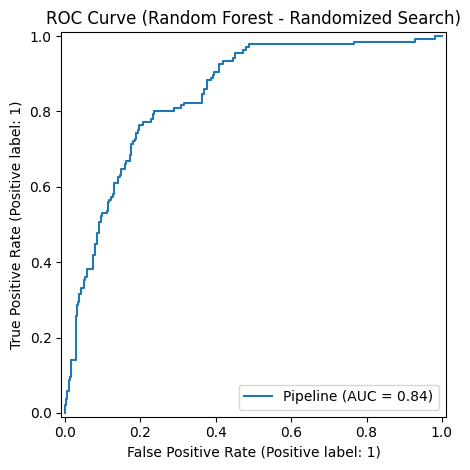

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


param_dist_2 = {
    'classifier__n_estimators': randint(100, 201),
    'classifier__max_depth': [5, 10, None]
}

random_search = RandomizedSearchCV(
    model_pipeline_2,
    param_distributions=param_dist_2,
    n_iter=100,
    cv=5,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
best_params = random_search.best_params_
print("✅ Best Parameters:", best_params)

# preddiction on test set
y_pred_2 = best_model.predict(X_test)
y_proba_2 = best_model.predict_proba(X_test)[:, 1]
#setting a threshold value
threshold = 0.53
y_pred_v = (y_proba_2 >= threshold).astype(int)
print("🔍 test Accuracy:", accuracy_score(y_test, y_pred_v))
print("🔍 test ROC AUC:", roc_auc_score(y_test, y_proba_2))
print("🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_v))
print("\n test Classification Report:\n", classification_report(y_test, y_pred_v))
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("ROC Curve (Random Forest - Randomized Search)")
plt.tight_layout()
plt.show()


##### After tuning the hyperparametersand changing the threshold(in order to increase precision) both models demonstrated an increase in accuracy and overall performance.

## SUB TASK 4

In [ ]:


data = {
    'Metric': ['Accuracy', 'ROC AUC', 'Precision (class 1)', 'Recall (class 1)', 'F1-score (class 1)'],
    'Logistic Regression': [0.76, 0.830, 0.58, 0.73, 0.64],
    'Random Forest': [0.79, 0.843, 0.63, 0.76, 0.69]
}
df = pd.DataFrame(data)
print(df)


                Metric  Logistic Regression  Random Forest
0             Accuracy                 0.76          0.790
1              ROC AUC                 0.83          0.843
2  Precision (class 1)                 0.58          0.630
3     Recall (class 1)                 0.73          0.760
4   F1-score (class 1)                 0.64          0.690


Random Forest performs better overall as it accuracy is higher (0.79 vs 0.76)
Higher ROC AUC (0.843 vs. 0.830), indicating better discrimination between purchasers and non-purchasers across decision thresholds.
Precision and recall is also better for random forest indicating its returning less false positive and false negative compared to logistic regression classifier.

Why?

Random Forest’s ability to capture nonlinear relationships and feature interactions in complex behavioral data gives it an edge over Logistic Regression’s linear decision boundary.

Reasons for Performance Differences

* Logistic Regression assumes linear relationships between features and the log-odds of purchase whereas can model complex interactions and nonlinearities.
* Logistic regression might underperform if user behavior patterns are complex and nonlinear and its also sensitive to noise unlike Random Forest which is robust to noise due to bootstrap aggregation and random feature selection and handles mixed feature types and irrelevant features better.


| Model                   | Strengths                                                                                                                    | Weaknesses                                                                                              |
| ----------------------- | ---------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------- |
| **Logistic Regression** | - Simple, fast, and interpretable<br>- Well understood coefficients                                       | - Limited to linear relationships<br>- Sensitive to noise and correlated features                       |
| **Random Forest**       | - Captures complex, nonlinear patterns<br>- Robust to noisy and irrelevant features<br>- Often better predictive performance | - Less interpretable<br>- More computationally intensive<br>- Risk of overfitting if not tuned properly |


### Optional Task

In [ ]:
X_train1 = df_train.drop(['Purchase'], axis=1)
# One-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train1, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align columns (in case test set is missing any categories present in training)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Convert to numpy arrays
X_train_np = X_train_encoded.to_numpy()
X_test_np = X_test_encoded.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

### Cost function for regularized logistic regression


$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$

###  Gradient for logistic regression



$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously
$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}   + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$

In [ ]:
def sigmoid(z):

    g = 1/(1+np.exp(-z))
    return g

def compute_cost(X, y, w, b, *argv):


    m, n = X.shape

    loss_sum=0
    for i in range(m):
        z=0
        for j in range(n):
            z += w[j]*X[i][j]
        z+=b
        loss_sum +=(-y[i]*np.log(sigmoid(z)+1e-15))-((1-y[i])*np.log(1-sigmoid(z)+1e-15))


    total_cost = loss_sum/m


    return total_cost

def compute_gradient(X, y, w, b):

    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        z_wb = 0
        for j in range(n):
            z_wb += w[j]*X[i][j]
        z_wb += b
        f_wb = sigmoid(z_wb)

        dj_db_i = f_wb -y[i]
        dj_db += dj_db_i

        for j in range(n):
            dj_dw[j] += dj_db_i*X[i][j]

    dj_dw = dj_dw/m
    dj_db = dj_db/m



    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):

    # number of training examples
    m = len(X)

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db



    return w_in, b_in

def compute_cost_reg(X, y, w, b, lambda_ = 1):
    m, n = X.shape
    cost_without_reg = compute_cost(X, y, w, b)
    reg_cost = 0.
    for i in range(n):
        reg_cost+=w[i]**2
    reg_cost = reg_cost*lambda_/(2*m)

    # Add the regularization cost to get the total cost
    total_cost = cost_without_reg + reg_cost

    return total_cost

def compute_gradient_reg(X, y, w, b, lambda_ = 1):

    m, n = X.shape

    dj_db, dj_dw = compute_gradient(X, y, w, b)
    for i in range(n):
        dj_dw[i]+= w[i]*lambda_/m

    return dj_db, dj_dw

def predict(X, w, b):


    m, n = X.shape
    p = np.zeros(m)

    for i in range(m):
        z_wb = 0
        # Loop over each feature
        for j in range(n):
            # Add the corresponding term to z_wb
            z_wb += w[j]*X[i][j]

        # Add bias term
        z_wb += b

        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        if f_wb>0.5:
            p[i]=1
        else:
            p[i]=0

    return p

In [ ]:
np.random.seed(1)
initial_w = np.random.rand(X_train_np.shape[1])-0.5
initial_b = 1.

#regularization parameter lambda
lambda_ = 0.00001


iterations = 100
alpha = 0.009

w,b= gradient_descent(X_train_np, y_train_np, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg ,alpha, iterations, lambda_)
# predictiong on test set
y_pred =predict(X_train_np ,w,b)
y_test_pred =predict(X_test_np,w,b)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_test_pred)
print(f"acc :{acc:.2f}")


the accuracy is high for library implemented model
